# 남이 만든 CNN! (Pretrained CNN)
---
## 쉽지만 중요한 코너!
## 이미 **'잘 만들어진'** 모델들을 가져다가 사용해보자.

- [이 링크를 참고해보자](https://www.tensorflow.org/api_docs/python/tf/keras/applications)

## Keras Update

In [1]:
!pip install --upgrade keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 30.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.1.1 which is incompatible.


In [2]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

## Library Loading

In [3]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

import numpy as np
import matplotlib.pyplot as plt

## Load **Pretrained** Model

- **"잘 만들어진"** 모델 바로 가져오기!

In [4]:
vgg_model = VGG16(include_top=True,       # VGG16 모델의 아웃풋 레이어까지 전부 불러오기
                  weights='imagenet',     # ImageNet 데이터를 기반으로 학습된 가중치 불러오기
                  input_shape=(224,224,3) # 모델에 들어가는 데이터의 형태
                  )

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:
vgg_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
from keras.utils import plot_model

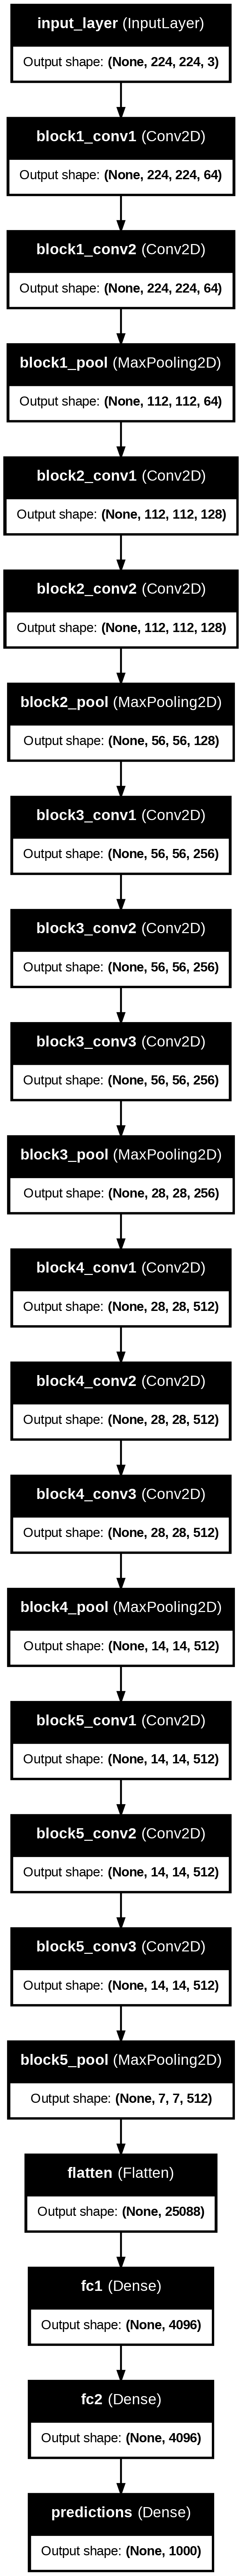

In [7]:
plot_model(vgg_model, show_shapes=True, show_layer_names=True)

* 아웃풋 레이어를 보면 노드가 1000개!

* 분류 가능한 이미지가 1000개라는 뜻!

* [**구경하러 가자**](http://image-net.org/challenges/LSVRC/2014/browse-synsets)

# 이미지 파일을 업로드 해둔 곳으로 가자!
---
### **구글 드라이브에 수집한 이미지를 업로드!**
### **순서**
1. 구글링하여 이미지를 수집합니다.
2. **본인의** 구글 드라이브에 my_data 폴더를 생성합니다.
3. my_data 폴더 안에 img1 폴더를 생성합니다.
4. 1번 단계에서 수집한 이미지를 img1 폴더에 업로드 합니다.
5. 30초 정도 기다립시다.
6. 아래의 코드들을 실행합니다.

## Connect Colaboratory with my Google Drive
- Colaboratory와 본인의 구글 드라이브를 연결하는 과정
- 아래 코드를 실행하여 폴더가 올바르게 생성 되었는지 확인

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
!ls

drive  model.png  sample_data


In [24]:
!cd /content/drive/MyDrive/my_data; ls

0.png  1.png  2.png  3.png  4.png  5.png  6.png  7.png	8.png  9.png  img1  new_data


## Load Image
- 업로드 한 이미지 하나를 불러와 확인해본다

In [25]:
import glob
from keras.preprocessing import image

In [26]:
files = glob.glob('/content/drive/MyDrive/my_data/img1/*')
files

['/content/drive/MyDrive/my_data/img1/123449_145665_1147.png',
 '/content/drive/MyDrive/my_data/img1/images.jpg',
 '/content/drive/MyDrive/my_data/img1/20230111503366.jpg',
 '/content/drive/MyDrive/my_data/img1/썸네일.jpg',
 '/content/drive/MyDrive/my_data/img1/035d01c442580.png',
 '/content/drive/MyDrive/my_data/img1/image-26.png',
 '/content/drive/MyDrive/my_data/img1/1706870132971_0.jpg',
 '/content/drive/MyDrive/my_data/img1/_temp_16908077444496view.jpg',
 '/content/drive/MyDrive/my_data/img1/main-d3bbc024-549a-4a23-9c08-5cb675d6b028.jpg',
 '/content/drive/MyDrive/my_data/img1/다운로드.jpg',
 '/content/drive/MyDrive/my_data/img1/20220523519355.jpg',
 '/content/drive/MyDrive/my_data/img1/202002220404_11150924123740_1.jpg',
 '/content/drive/MyDrive/my_data/img1/20180609-07.jpg',
 '/content/drive/MyDrive/my_data/img1/e5fb2edc028e76648d318746907740fb.jpg',
 '/content/drive/MyDrive/my_data/img1/KakaoTalk_20240403_140812448.jpg',
 '/content/drive/MyDrive/my_data/img1/KakaoTalk_2024040

preprocess 전: 최대값=255.0, 최소값=0.0
preprocess 후: 최대값=151.06100463867188, 최소값=-123.68000030517578
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[('n02843684', 'birdhouse', 0.6185569), ('n02971356', 'carton', 0.06020604), ('n03887697', 'paper_towel', 0.046142515)]]


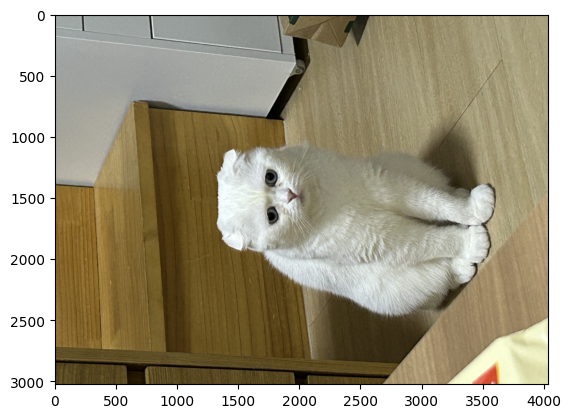

In [27]:
img = image.load_img(files[-1], color_mode='rgb', target_size = (224,224) )
img = image.img_to_array(img)
img = img.reshape((-1,224,224,3))
print(f'preprocess 전: 최대값={np.max(img)}, 최소값={np.min(img)}')

img = preprocess_input(img)
print(f'preprocess 후: 최대값={np.max(img)}, 최소값={np.min(img)}')

features = vgg_model.predict(img)
print(decode_predictions(features, top=3))

plt.imshow(image.load_img(files[-1]))
plt.show()

## Load Images
- 업로드 한 이미지 전체를 확인해본다

In [28]:
images = []

for path in files :
    img = image.load_img(path, color_mode='rgb', target_size=(224,224) )
    img = image.img_to_array(img)
    img = preprocess_input(img)
    images.append(img)

images = np.array(images)

In [29]:
features = vgg_model.predict(images)
predictions = decode_predictions(features, top=3)

for i in range(images.shape[0]) :
    print(predictions[i])
    plt.imshow(image.load_img(files[i]))
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

# **Easy, but Very Important Exercise!**

* 강아지 이미지를 수집합시다. (다른 것으로 해도 됨.)
* 본인이 판단하기에 잘 될 법한 강아지 이미지 10개를 찾아봅시다.
* 본인이 판단하기에 잘 안 될 법한 강아지 이미지 10개를 찾아봅시다.
---
- **경로 설정**
    1. my_data 폴더 안에 img2 폴더를 생성합니다.
    2. 수집한 이미지를 img2 폴더에 업로드 하세요.

In [ ]:
import glob

In [ ]:
files = glob.glob('/content/drive/MyDrive/my_data/img2/*')
files

In [ ]:
images = []

for path in files :
    img = image.load_img(path, color_mode='rgb', target_size=(224,224) )
    img = image.img_to_array(img)
    img = preprocess_input(img)
    images.append(img)

images = np.array(images)

In [ ]:
features = vgg_model.predict(images)
predictions = decode_predictions(features, top=3)

for i in range(images.shape[0]) :
    print(predictions[i])
    plt.imshow(image.load_img(files[i]))
    plt.show()